# Illya-BOICHUK-Camp-2025

## Answer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

plt.style.use('default')
sns.set_palette("viridis")
data = pd.read_csv("./datasets/Iris.csv", index_col='Id')
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())

Dataset shape: (150, 5)

First 5 rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

Summary statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000    

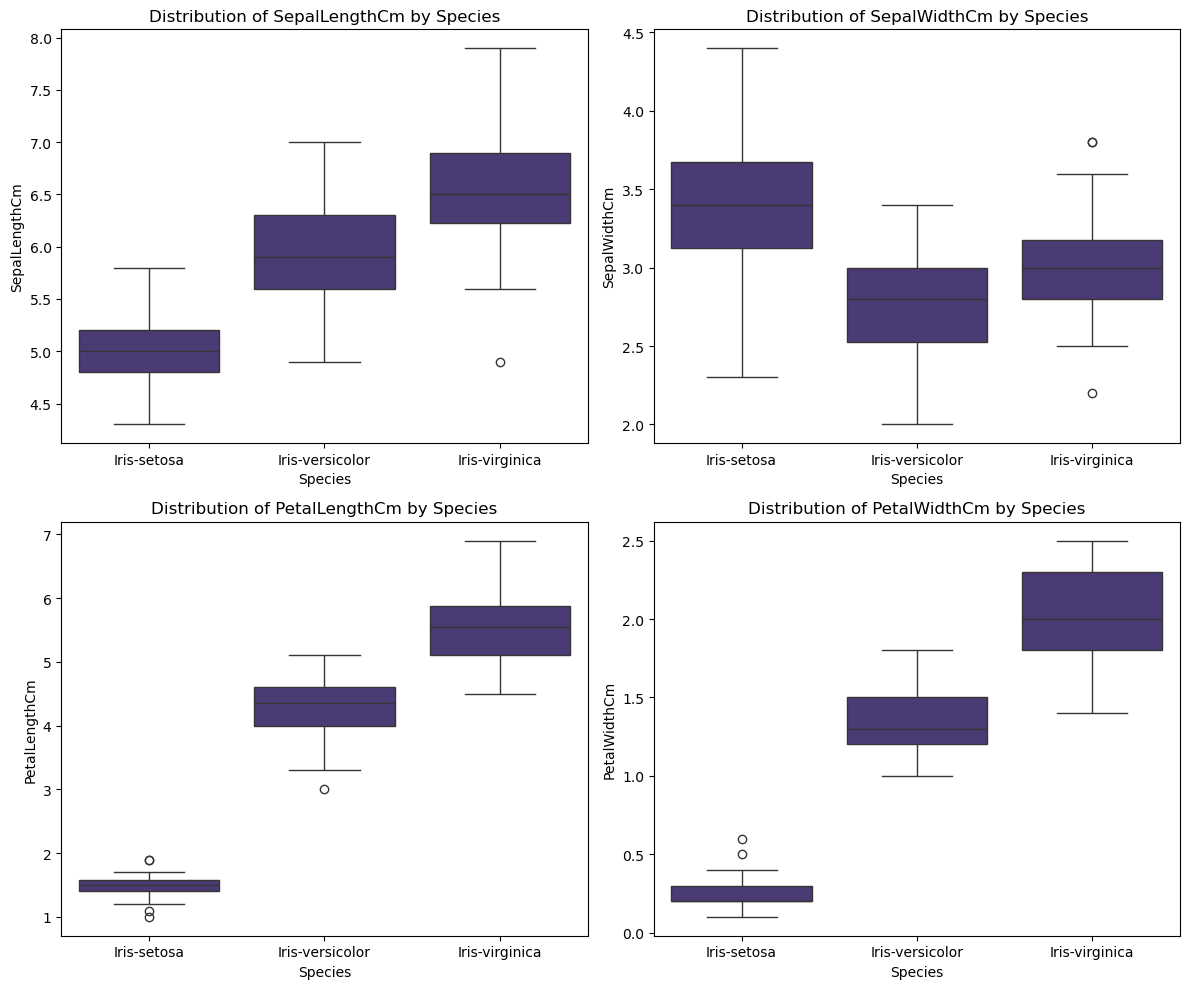

In [3]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(data.columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

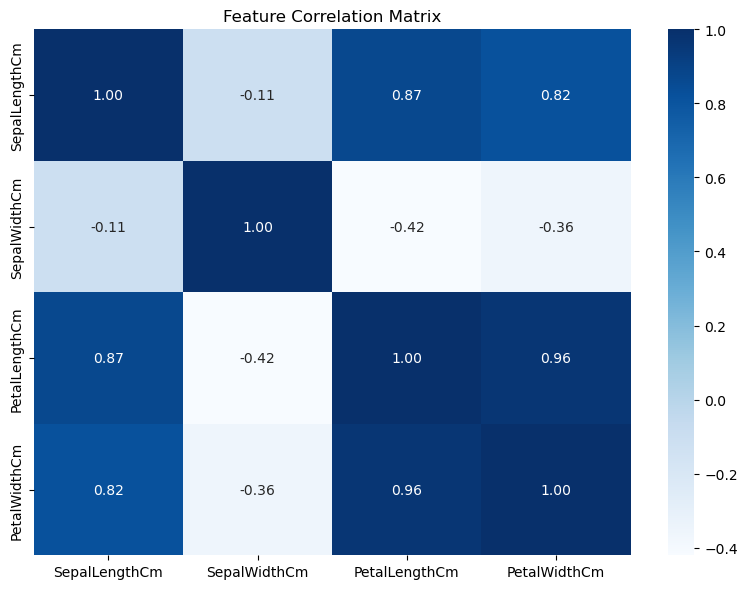

In [4]:
plt.figure(figsize=(8, 6))
correlation = data.iloc[:, :4].corr()
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

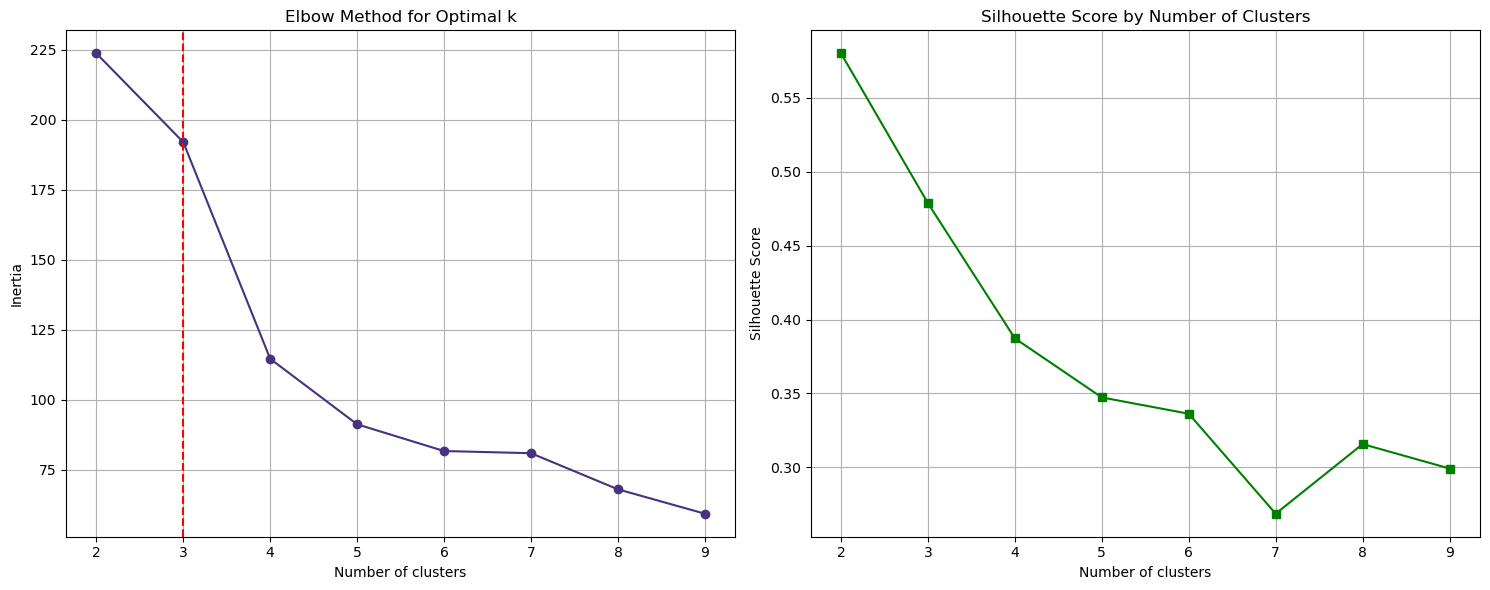

In [5]:
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
k_values = range(2, 10)
inertia_values = []
silhouette_values = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(scaled_features)
    inertia_values.append(model.inertia_)
    silhouette_values.append(silhouette_score(scaled_features, model.labels_))
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k=3')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values, marker='s', color='green')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
model = KMeans(n_clusters=3, random_state=42, n_init='auto')
data['cluster'] = model.fit_predict(scaled_features)
centers = pd.DataFrame(
    scaler.inverse_transform(model.cluster_centers_),
    columns=features.columns,
    index=[f"Cluster {i}" for i in range(3)]
)
print("\nCluster Centers:")
print(centers)


Cluster Centers:
           SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Cluster 0       6.314583      2.895833       4.973958      1.703125
Cluster 1       5.178125      3.631250       1.496875      0.278125
Cluster 2       4.754545      2.904545       1.745455      0.336364


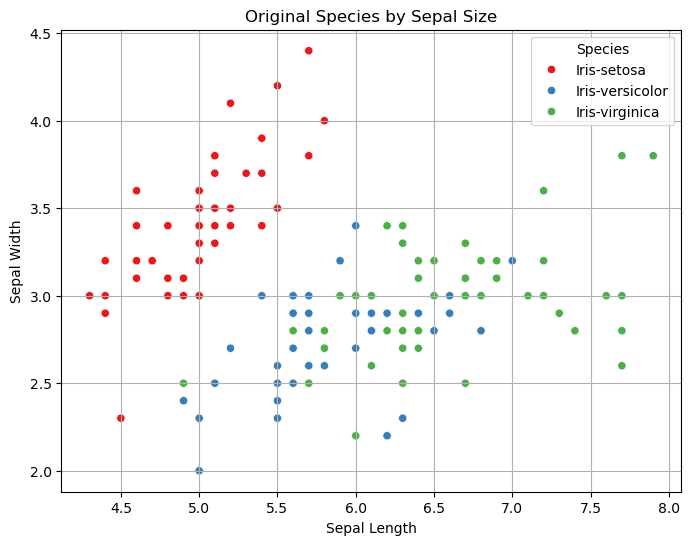

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Original Species by Sepal Size')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.legend(title='Species')
plt.show()

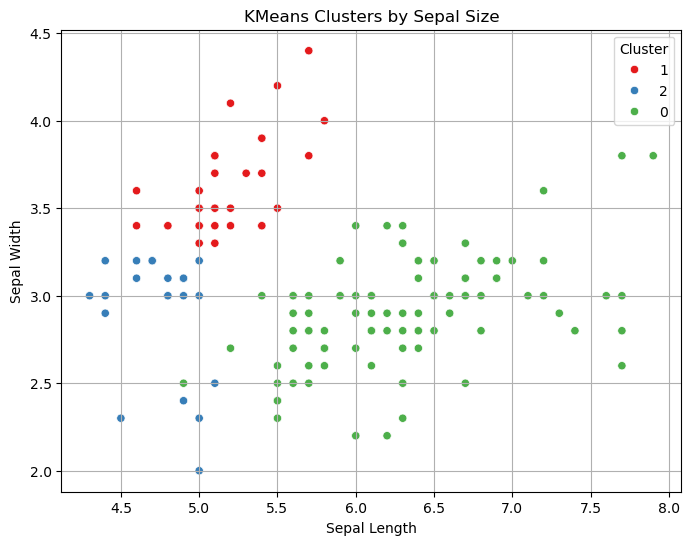

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue=data['cluster'].astype(str), palette='Set1')
plt.title('KMeans Clusters by Sepal Size')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


PCA explained variance: 95.80%


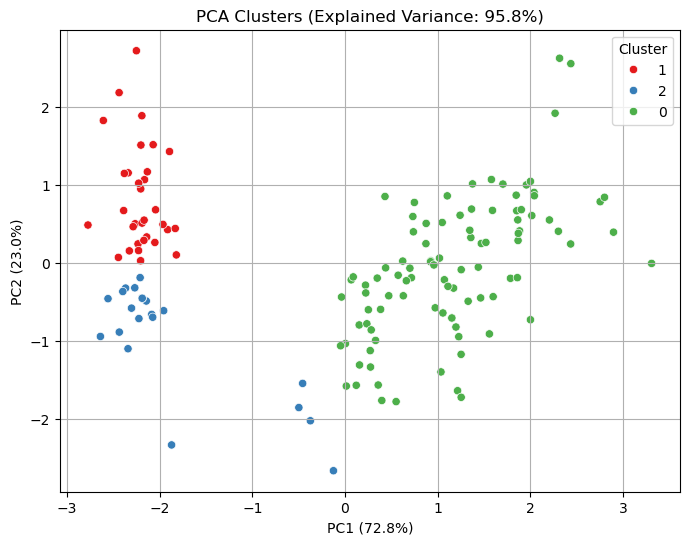

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)
data['pca1'] = pca_data[:, 0]
data['pca2'] = pca_data[:, 1]
total_variance = pca.explained_variance_ratio_.sum() * 100
print(f"\nPCA explained variance: {total_variance:.2f}%")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue=data['cluster'].astype(str), palette='Set1')
plt.title(f"PCA Clusters (Explained Variance: {total_variance:.1f}%)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


Cluster-Species Correspondence:
Cluster           0   1   2
Actual                     
Iris-setosa       0  32  18
Iris-versicolor  46   0   4
Iris-virginica   50   0   0


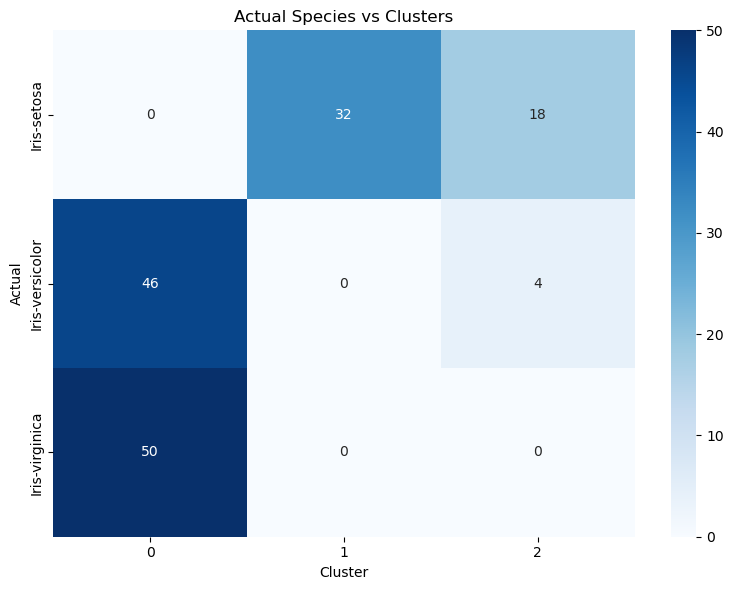

In [9]:
cross_tab = pd.crosstab(data['Species'], data['cluster'], rownames=['Actual'], colnames=['Cluster'])
print("\nCluster-Species Correspondence:")
print(cross_tab)
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Actual Species vs Clusters')
plt.tight_layout()
plt.show()